<a href="https://colab.research.google.com/github/ronitavalani/467Project/blob/main/baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#imports
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

In [ ]:
#load dataset
url = 'https://raw.githubusercontent.com/ronitavalani/467Project/main/spotify_songs.csv'
df = pd.read_csv(url)

df['playlist_genre'] = df['playlist_genre'].astype(str).apply(lambda x: x.split(',')[0].strip())

In [ ]:
non_numeric_cols = df.select_dtypes(include=['object']).columns.tolist()
non_numeric_cols.remove('playlist_genre')
df = df.drop(columns=non_numeric_cols)

# Drop empty values
df = df.dropna()

# Create input and output
X = df.drop(columns=['playlist_genre'])
y = df['playlist_genre']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
k_values = range(1, 11)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring="accuracy")
    cv_scores.append(scores.mean())

best_k = k_values[np.argmax(cv_scores)]
print(f"Best k = {best_k}, CV accuracy = {cv_scores[best_k - 1]:.4f}")


Best k = 10, CV accuracy = 0.4773


In [ ]:
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_scaled, y_train)
test_accuracy = final_knn.score(X_test_scaled, y_test)
print(f"Test Accuracy (k={best_k}): {test_accuracy:.4f}")

Test Accuracy (k=10): 0.4661


Train Accuracy (k=10): 0.5787


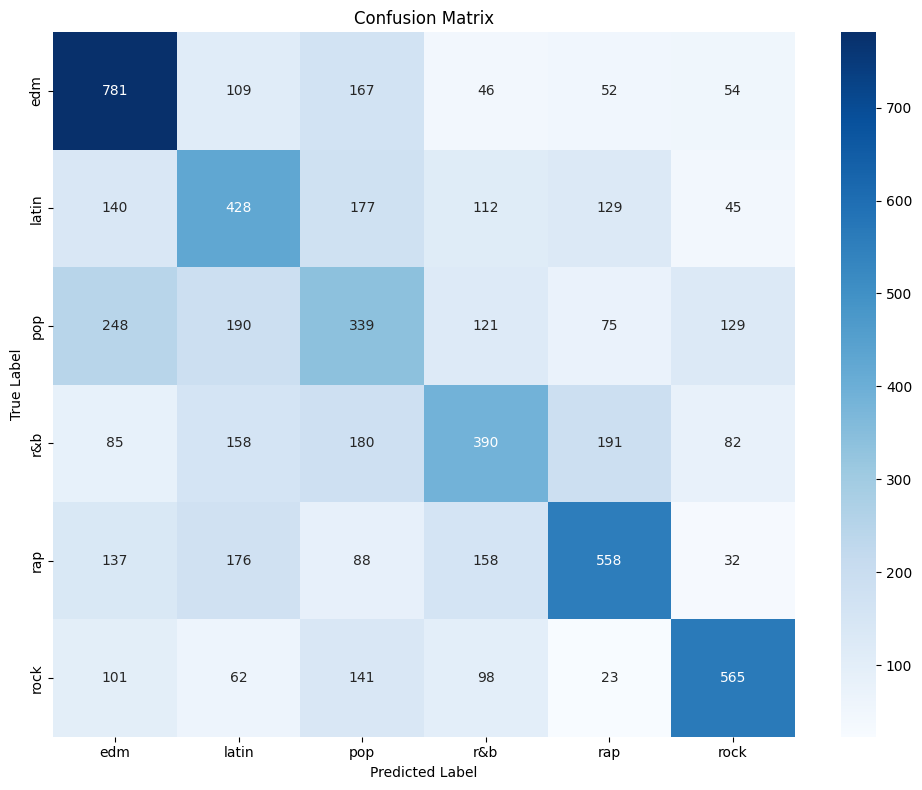

In [ ]:
# Evaluate
train_accuracy = final_knn.score(X_train_scaled, y_train)
print(f"Train Accuracy (k={best_k}): {train_accuracy:.4f}")

# Confusion matrix
le = LabelEncoder()
y = le.fit_transform(df['playlist_genre'])
final_pred = final_knn.predict(X_test_scaled)
cm = confusion_matrix(y_test, final_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()
# plt.savefig('confusion_matrix.png')
plt.close()

In [ ]:
from sklearn.metrics import classification_report

print("\nClassification Report:")
print(classification_report(y_test, final_pred, target_names=le.classes_))


Classification Report:
              precision    recall  f1-score   support

         edm       0.52      0.65      0.58      1209
       latin       0.38      0.42      0.40      1031
         pop       0.31      0.31      0.31      1102
         r&b       0.42      0.36      0.39      1086
         rap       0.54      0.49      0.51      1149
        rock       0.62      0.57      0.60       990

    accuracy                           0.47      6567
   macro avg       0.47      0.46      0.46      6567
weighted avg       0.47      0.47      0.46      6567

